In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [146]:
np.random.seed(0)  # Definindo a semente para reproduzibilidade dos resultados

n = 500  # Número de pontos de dados
tempo = np.arange(n)  # Vetor de tempo

media_homocedastico = 10  # Média constante
desvio_padrao_homocedastico = 2  # Desvio padrão constante

dados_homocedastico = np.random.normal(loc=media_homocedastico, scale=desvio_padrao_homocedastico, size=n)


In [147]:
media_inicial_heterocedastico = 10  # Média inicial
desvio_padrao_inicial_heterocedastico = 2  # Desvio padrão inicial

tendencia = 0.1  # Tendência da média ao longo do tempo

dados_heterocedastico = []

for i in range(n):
    desvio_padrao_heterocedastico = desvio_padrao_inicial_heterocedastico + tendencia * i
    dado = np.random.normal(loc=media_inicial_heterocedastico, scale=desvio_padrao_heterocedastico)
    dados_heterocedastico.append(dado)
    media_inicial_heterocedastico += tendencia

dados_heterocedastico = np.array(dados_heterocedastico)


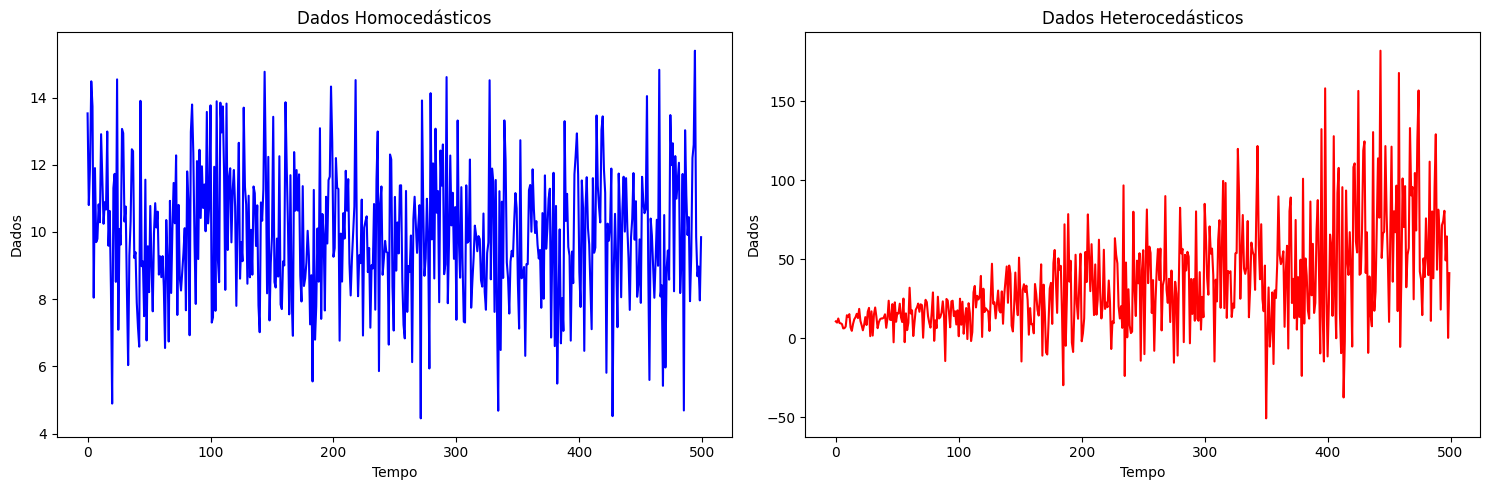

In [148]:
plt.figure(figsize=(15, 5))

# Gráfico de dados homocedásticos
plt.subplot(1, 2, 1)
plt.plot(tempo, dados_homocedastico, 'b-')
plt.xlabel('Tempo')
plt.ylabel('Dados')
plt.title('Dados Homocedásticos')

# Gráfico de dados heterocedásticos
plt.subplot(1, 2, 2)
plt.plot(tempo, dados_heterocedastico, 'r-')
plt.xlabel('Tempo')
plt.ylabel('Dados')
plt.title('Dados Heterocedásticos')

plt.tight_layout()
plt.show()


O primeiro gráfico mostra os dados homocedásticos, onde a média é constante ao longo do tempo. O segundo gráfico mostra os dados heterocedásticos, onde a média varia com o tempo.


## Estacionaria (homocedastica)

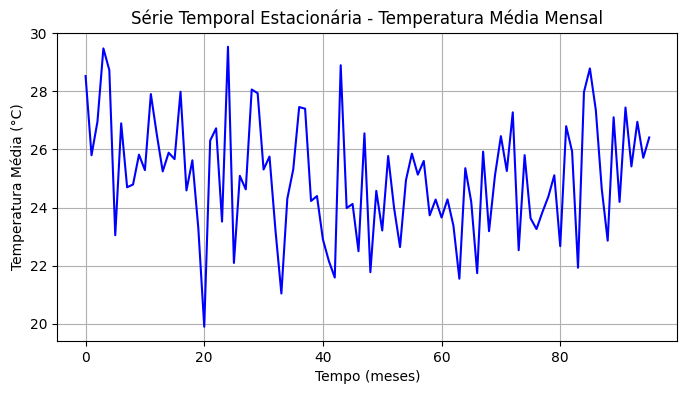

In [149]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Gerando dados da série temporal
n = 96  # 8 anos (96 meses)
tempo = np.arange(n)
temperatura_media = np.random.normal(loc=25, scale=2, size=n)

# Plotando a série temporal
plt.figure(figsize=(8, 4))
plt.plot(tempo, temperatura_media, 'b-')
plt.xlabel('Tempo (meses)')
plt.ylabel('Temperatura Média (°C)')
plt.title('Série Temporal Estacionária - Temperatura Média Mensal')
plt.grid(True)
plt.show()


Neste exemplo, estou gerando 96 pontos de dados para representar a temperatura média mensal ao longo de 8 anos (96 meses). Utilizo uma distribuição normal para gerar os valores de temperatura com média de 25°C e desvio padrão de 2°C.

como se trata de uma série estacionária, não haverá nenhuma tendência ou padrão discernível no comportamento da temperatura. A média e a variância da série se mantêm aproximadamente constantes ao longo do tempo.



## Correlação consistente

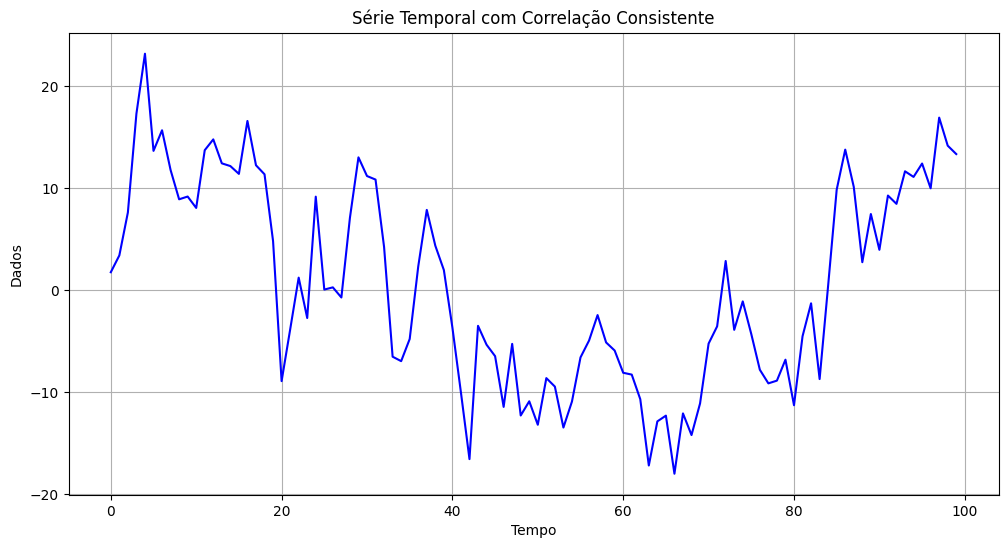

In [150]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n = 100  # Número de pontos de dados
tempo = np.arange(n)  # Vetor de tempo

correlacao = 0.8  # Correlação entre pontos de dados consecutivos
media = 0  # Média do ruído aleatório
desvio_padrao = 5  # Desvio padrão do ruído aleatório

dados = np.zeros(n)  # Vetor para armazenar os dados
dados[0] = np.random.normal(loc=0, scale=1)  # Valor inicial aleatório

for i in range(1, n):
    ruído = np.random.normal(loc=media, scale=desvio_padrao)
    dados[i] = correlacao * dados[i - 1] + ruído

plt.figure(figsize=(12, 6))
plt.plot(tempo, dados, 'b-')
plt.xlabel('Tempo')
plt.ylabel('Dados')
plt.title('Série Temporal com Correlação Consistente')
plt.grid(True)
plt.show()


Nesse exemplo, definimos um valor de correlação de 0.8 entre pontos de dados consecutivos. Isso significa que cada ponto de dados é calculado multiplicando o valor anterior por 0.8 e adicionando um ruído aleatório. O ruído é gerado a partir de uma distribuição normal com média zero e desvio padrão de 5.

Ao plotar a série temporal resultante, você verá um gráfico de linhas que mostra a correlação consistente entre os pontos de dados ao longo do tempo. Os pontos de dados tenderão a acompanhar a tendência estabelecida pela correlação, mas ainda terão algum nível de ruído aleatório.

Uma correlação consistente no tempo indica que as observações em um momento estão relacionadas com as observações anteriores. Isso pode ocorrer em muitos contextos diferentes, como dados financeiros, séries climáticas ou análise de vendas, onde a tendência passada pode afetar a tendência futura.

## Influencia direta e indireta

**Influência Direta:**

A influência direta ocorre quando uma venda em um dia específico afeta diretamente as vendas do dia seguinte. Por exemplo, se um determinado dia teve um grande volume de vendas, é provável que haja um aumento nas vendas no dia seguinte devido a fatores como atração de clientes, recompra ou vendas relacionadas.

Essa influência direta é baseada em uma relação causal, onde a ocorrência de vendas em um determinado dia afeta diretamente as vendas subsequentes. Pode ser resultado de fatores como promoções, eventos especiais, mudanças na demanda do consumidor, entre outros.

**Influência Indireta:**

A influência indireta ocorre quando o desempenho de vendas em um determinado dia é afetado por informações dos dias anteriores. Por exemplo, as informações de vendas de ontem são usadas para estimar a demanda futura e tomar decisões estratégicas, como ajuste de estoque, programação de promoções ou alocação de recursos.

Essa influência indireta é baseada em uma relação não causal ou mediada por outras variáveis. As informações dos dias anteriores são usadas para prever e ajustar as vendas futuras. Isso pode ser feito por meio de técnicas de previsão, como modelos de séries temporais, onde os padrões históricos são analisados para estimar o desempenho futuro das vendas.

No contexto de séries temporais, as informações do passado (como as vendas anteriores) são usadas para prever o futuro (as vendas futuras). Através de modelos estatísticos, métodos de aprendizado de máquina ou técnicas de análise de séries temporais, é possível identificar padrões e tendências nos dados históricos que ajudam a estimar o comportamento futuro.


## ACF - Autocorrelation Function

<Figure size 1200x600 with 0 Axes>

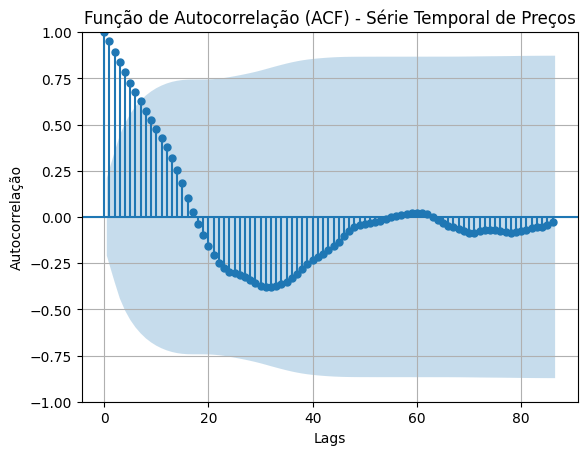

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

dados = pd.read_csv('/content/preco.csv', decimal=',')
preco = dados['preco'].astype(float)  # Converter a coluna de preços para float
n = len(preco)  # Número de períodos

plt.figure(figsize=(12, 6))
plot_acf(preco, lags=n-1)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('Função de Autocorrelação (ACF) - Série Temporal de Preços')
plt.grid(True)
plt.show()




ACF (Função de Autocorrelação): A ACF mede a correlação entre os valores atuais e todos os valores defasados da série temporal(lags). Ela fornece informações sobre a correlação geral em diferentes defasagens e ajuda a identificar a presença de padrões repetitivos na série temporal. O gráfico da ACF mostra a correlação em cada defasagem.

## PACF - Parcial auto correlation function

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

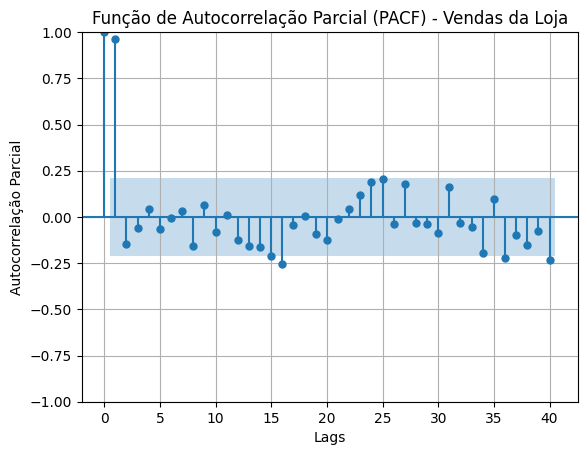

In [152]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12, 6))
plot_pacf(preco, lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.title('Função de Autocorrelação Parcial (PACF) - Vendas da Loja')
plt.grid(True)
plt.show()







PACF (Função de Autocorrelação Parcial): A PACF mede a correlação direta entre os valores atuais e suas defasagens, removendo a influência das defasagens intermediárias. Ela fornece informações sobre a correlação específica entre dois pontos, controlando a influência de outros pontos intermediários. A PACF é útil para identificar a ordem de um possível modelo de séries temporais, pois mostra as correlações significativas após remover a influência das defasagens intermediárias. O gráfico da PACF mostra a correlação parcial em cada defasagem.

## Media movel (ACF)

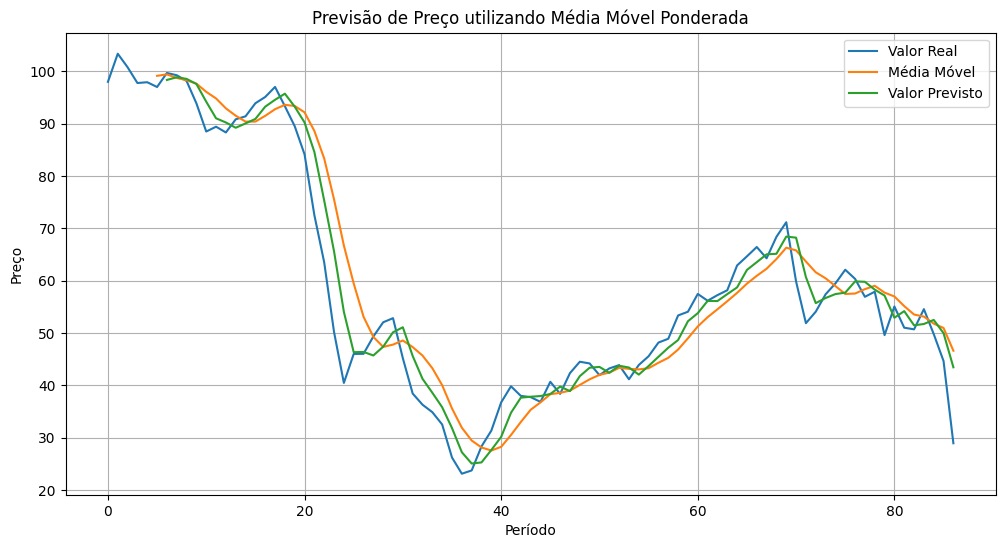

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('/content/preco.csv', decimal=',')
preco = dados['preco'].astype(float)

media_movel = preco.rolling(window=6).mean()  # Média móvel de 7 períodos (uma semana)

valor_previsto = media_movel.copy()

for i in range(1, len(valor_previsto)):
    erro = preco[i-1] - media_movel[i-1]
    valor_previsto[i] = media_movel[i] + 0.5 * erro

plt.figure(figsize=(12, 6))
plt.plot(preco, label='Valor Real')
plt.plot(media_movel, label='Média Móvel')
plt.plot(valor_previsto, label='Valor Previsto')
plt.xlabel('Período')
plt.ylabel('Preço')
plt.title('Previsão de Preço utilizando Média Móvel Ponderada')
plt.legend()
plt.grid(True)
plt.show()


## MODELO AR - (PACF)

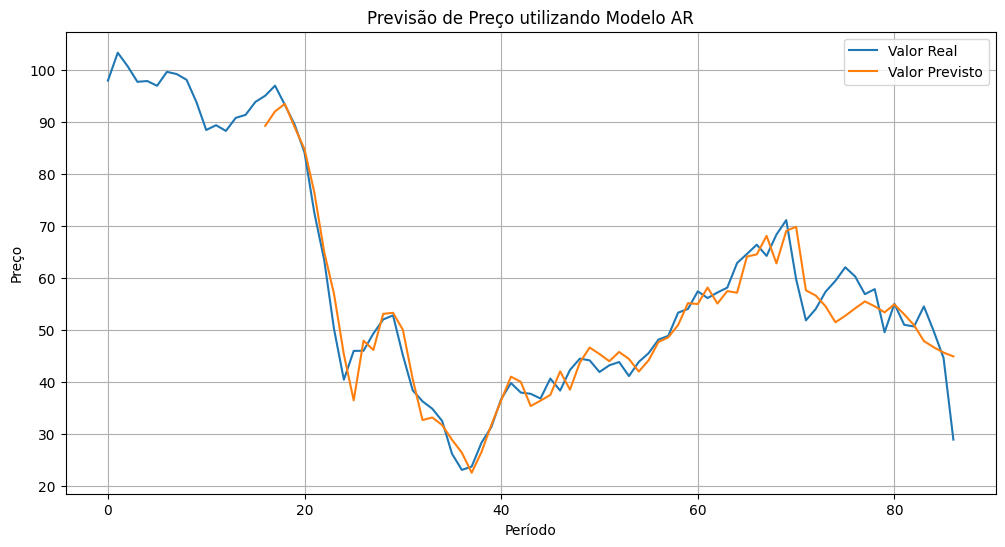

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

dados = pd.read_csv('/content/preco.csv', decimal=',')
preco = dados['preco'].astype(float)

lag = 16  # Atraso do modelo AR
train_data = preco[:-lag]  # Dados para treinamento (sem os últimos lag períodos)

model = AutoReg(train_data, lags=lag)
model_fit = model.fit()

valor_previsto = model_fit.predict(start=lag, end=len(preco)-1)

plt.figure(figsize=(12, 6))
plt.plot(preco, label='Valor Real')
plt.plot(valor_previsto, label='Valor Previsto')
plt.xlabel('Período')
plt.ylabel('Preço')
plt.title('Previsão de Preço utilizando Modelo AR')
plt.legend()
plt.grid(True)
plt.show()
